# 20i-1843_Faizan Aslam ML-lab2

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv(f'Housing.csv')
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


# Task1

In [4]:
df1=df['price']
print('mean of price column :',df1.mean())
# print('mode of price column :',df1.mode())
print('standard deviation of price column :',df1.std())

mean of price column : 1058779.8678899081
standard deviation of price column : 667148.2157118549


In [5]:
print('Z-score of price column is given below')
(df1-df1.mean())/df1.std()

Z-score of price column is given below


0      0.610233
1      3.095450
2      0.691175
3      0.139897
4     -0.257046
         ...   
540   -1.020613
541   -0.862920
542   -1.041004
543   -0.486578
544    0.849119
Name: price, Length: 545, dtype: float64

# Task2

In [6]:

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# df.isnull().sum()  # Found not any nan so commenting it
y=df['furnishingstatus']           # Prdicting label column
x=df.drop(['furnishingstatus'],axis=1)  # Rest dataset
x

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no


In [8]:
x['mainroad']=le.fit_transform(df['mainroad'])
x['guestroom']=le.fit_transform(df['guestroom'	])
x['basement']=le.fit_transform(df['basement'])
x['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
x['airconditioning']=le.fit_transform(df['airconditioning'])
x['prefarea']=le.fit_transform(df['prefarea'])
x


,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=51)
    
clf1=KNeighborsClassifier()
clf1.fit(X_train, y_train)
pred=clf1.predict(X_test)
clf1.score(X_test,y_test)

before_norm=(accuracy_score(y_test,pred)*100)

print ("Accuracy : " , accuracy_score(y_test,pred)*100) 
# print("Report : \n", classification_report(y_test,pred))
# print("F1 Score : ",f1_score(y_test,pred, average='macro')*100)

Accuracy :  37.61467889908257


# Task3

In [10]:
xx=df
xx=df.drop(['furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'],axis=1)  # Rest dataset
xx

,price,area,length,width,bedrooms,bathrooms,stories,parking
0,1465896,244316,593,412,4,2,3,2
1,3123904,390488,734,532,4,4,4,3
2,1519896,379974,498,763,3,2,2,2
3,1152112,288028,382,754,4,2,2,3
4,887292,221823,503,441,4,1,2,2
...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,2
541,483084,241542,497,486,3,1,1,0
542,364276,182138,374,487,2,1,1,0
543,734160,367080,570,644,3,1,1,0


In [11]:
normalized_x=xx
temp=xx
temp=xx.drop(['bedrooms','bathrooms','stories','parking'],axis=1)
temp=(temp-temp.min())/(temp.max()-temp.min())
normalized_x['price']=temp['price']
normalized_x['area']=temp['area']
normalized_x['length']=temp['length']
normalized_x['width']=temp['width']
normalized_x


,price,area,length,width,bedrooms,bathrooms,stories,parking
0,0.287069,0.288093,0.586,0.224,4,2,3,2
1,0.663195,0.569795,0.868,0.464,4,4,4,3
2,0.299319,0.549533,0.396,0.926,3,2,2,2
3,0.215885,0.372335,0.164,0.908,4,2,2,3
4,0.155810,0.244745,0.406,0.282,4,1,2,2
...,...,...,...,...,...,...,...,...
540,0.040247,0.181372,0.340,0.204,2,1,1,2
541,0.064113,0.282747,0.394,0.372,3,1,1,0
542,0.037161,0.168264,0.148,0.374,2,1,1,0
543,0.121071,0.524684,0.540,0.688,3,1,1,0


In [12]:
X_train, X_test, y_train, y_test =train_test_split(normalized_x, y, test_size=0.2, random_state=51)
    
clf1=KNeighborsClassifier()
clf1.fit(X_train, y_train)
pred=clf1.predict(X_test)
clf1.score(X_test,y_test)

after_norm=(accuracy_score(y_test,pred)*100)

print ("Accuracy : " , accuracy_score(y_test,pred)*100) 
# print("Report : \n", classification_report(y_test,pred))
# print("F1 Score : ",f1_score(y_test,pred, average='macro')*100)

Accuracy :  41.284403669724774


# Task4

In [13]:
print("Before normalizarion accuracy",before_norm)
print("After normalizarion accuracy",after_norm)

Before normalizarion accuracy 37.61467889908257
After normalizarion accuracy 41.284403669724774


In [14]:
print("Normalization has increased the accuracy")

Normalization has increased the accuracy


## Task 5

2-D graph of 2 independant features :-


<AxesSubplot:xlabel='length', ylabel='width'>

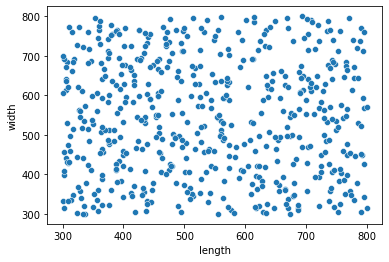

In [15]:
print("2-D graph of 2 independant features :-")
dict = {'length': df['length'], 'width': df['width']} 
df2=pd.DataFrame(dict)
import seaborn as sns
sns.scatterplot(x="length", y="width", data=df2)

3-D graph of 3 independant features :-


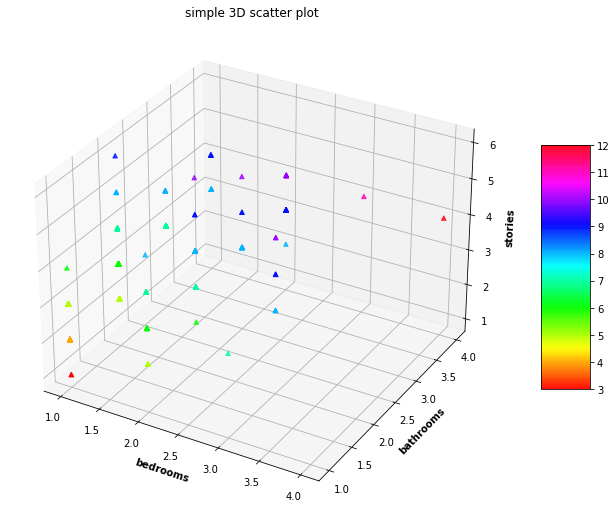

In [16]:
# Import libraries
print("3-D graph of 3 independant features :-")
from mpl_toolkits import mplot3d

# Creating dataset
z = df['bedrooms']
x = df['bathrooms']
y = df['stories']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,alpha = 0.8,c = (x + y + z),cmap = my_cmap,marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('bedrooms', fontweight ='bold')
ax.set_ylabel('bathrooms', fontweight ='bold')
ax.set_zlabel('stories', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()


## Task6 Finding covariance and coreletion of normalized dataset

In [17]:
normalized_x.cov()

,price,area,length,width,bedrooms,bathrooms,stories,parking
price,0.022906,0.020038,0.019557,0.017820,0.037506,0.021006,0.097208,-0.007205
area,0.020038,0.047448,0.044980,0.042667,0.005443,0.004682,-0.000091,-0.023454
length,0.019557,0.044980,0.088036,-0.001806,0.015686,0.006043,0.002222,-0.007975
width,0.017820,0.042667,-0.001806,0.083608,-0.000140,0.004671,0.001580,-0.033321
bedrooms,0.037506,0.005443,0.015686,-0.000140,0.544738,0.138674,0.261589,0.088562
bathrooms,0.021006,0.004682,0.006043,0.004671,0.138674,0.252476,0.142171,0.076842
stories,0.097208,-0.000091,0.002222,0.001580,0.261589,0.142171,0.752543,0.034043
parking,-0.007205,-0.023454,-0.007975,-0.033321,0.088562,0.076842,0.034043,0.742330


In [18]:
normalized_x.corr()

,price,area,length,width,bedrooms,bathrooms,stories,parking
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,-0.055252
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.124971
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.031198
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.133752
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,0.139270
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.177496
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.045547
parking,-0.055252,-0.124971,-0.031198,-0.133752,0.139270,0.177496,0.045547,1.000000


# Task7 Finding correlation length and area plotting it

In [19]:
import seaborn as sns

temp_df = df[['area' , 'length']]
df_corr = temp_df.corr()
df_corr

,area,length
area,1.000000,0.695952
length,0.695952,1.000000


<AxesSubplot:>

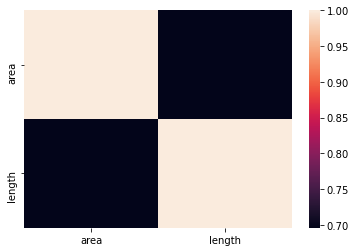

In [20]:
sns.heatmap(df_corr)

# Task8

In [21]:
sample=[]
cities=['A','B','C','D','E']
for a in cities:
    for b in cities:
        for c in cities:
            sample.append(a+b+c)
# sample

# Task8-i

In [22]:
count=0
for i in sample:
    if((i[0]==i[1])or(i[0]==i[2])or(i[1]==i[2])):  #or(i[0]==i[1] and i[1]==i[2])
        count=count+1   # count at end =65
print('Probability of the occurence of that event = ',count/len(sample))

Probability of the occurence of that event =  0.52


In [23]:
count1=0
for i in sample:
    if((i[0]!=i[1])and(i[0]!=i[2])and(i[1]!=i[2])):  #or(i[0]==i[1] and i[1]==i[2])
        count1=count1+1   # count at end =60
print('Probability of not occuring of that event = ',count1/len(sample))


Probability of not occuring of that event =  0.48


# Task8-ii

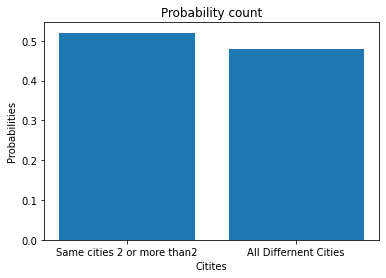

In [24]:
cities = ['Same cities 2 or more than2' , 'All Differnent Cities']
probabilities = []
probabilities.append(count/len(sample))
probabilities.append(count1/len(sample))

plt.bar(cities,probabilities)
plt.title("Probability count")
plt.xlabel("Citites")
plt.ylabel("Probabilities")
plt.show()

## Task8-iii Discrete or continuous one

In [25]:
print('It is a Discrete flow')

It is a Discrete flow


## Univariate or Multivariate problem?

In [26]:
print('Multivariate problem')

Multivariate problem


# Lab completed